In [ ]:
!pip install matplotlib

In [9]:
import pandas as pd
import numpy as np

# Loading our data
X_train_df = pd.read_csv("Xtrain.csv", sep=" ", header=None)
Y_train_df = pd.read_csv("Ytrain.csv", sep=" ", header=None)
X_test_df = pd.read_csv("Xtest.csv", sep=" ", header=None)

# Convert to NumPy
X_train = X_train_df.to_numpy()
Y_train = Y_train_df.to_numpy().flatten()  # Ensure it's a 1D array
X_test = X_test_df.to_numpy()

# Print shapes
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (3000, 784)
Y_train shape: (3000,)
X_test shape: (3000, 784)


Class -1: 2386 samples
Class 1: 614 samples


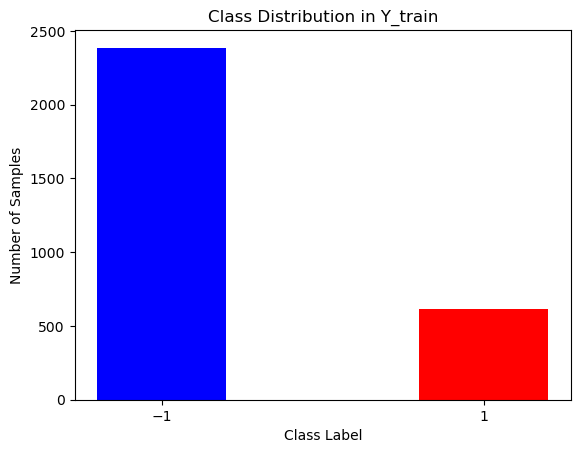

In [10]:
import matplotlib.pyplot as plt

# Count occurrences of each class in Y_train
unique_classes, class_counts = np.unique(Y_train, return_counts=True)

# Display class counts
for label, count in zip(unique_classes, class_counts):
    print(f"Class {label}: {count} samples")

# Plot class distribution
plt.bar(unique_classes, class_counts, color=['blue', 'red'])
plt.xticks(unique_classes)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Y_train")
plt.show()


Training Set

From the analysis, we have:

Class -1: 2,386 samples (~79.5%)
Class +1: 614 samples (~20.5%)

Test Set

The test set has no labels, so we cannot directly compute the distribution. However, the imbalance in the training set suggests the test set may also reflect this imbalance.


Does this Distribution Signify Potential Issues?
Yes, the class imbalance we see here can introduce various different problems while designing an ML solution:

1. Biased Predictions
Firstly, A machine learning model trained on this data might focus on the majority class (-1), as it contributes more to accuracy.
This could eventually result in an imbalanced and poor detection of the minority class (+1), which is often more critical (e.g., detecting rare events).
2. Misleading Evaluation Metrics
Accuracy would not be the correct metric for our use case. For example, a classifier predicting all samples as -1 would still achieve ~79.5% accuracy, even though it completely ignores class +1.
We would use metrics like AUC-PR, F1-score, and MCC since they are more appropriate for our case where there is a class imbalance.
3. Overfitting to the Majority Class
Models like Random Forest or SVM might overfit to the dominant class unless measures (e.g., class weights) are taken which we have been working with in later sections.
4. Generalisation Issues
If the test set has a more balanced distribution, a model biased toward the majority class in the training set will struggle to generalize.



Displaying 10 images from Class -1:


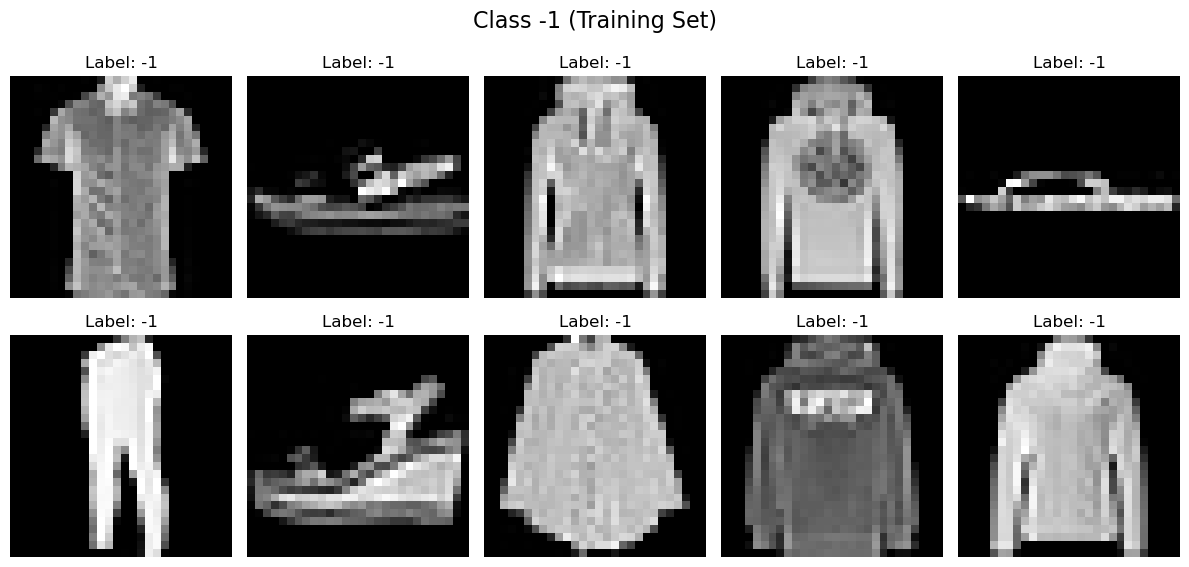

Displaying 10 images from Class +1:


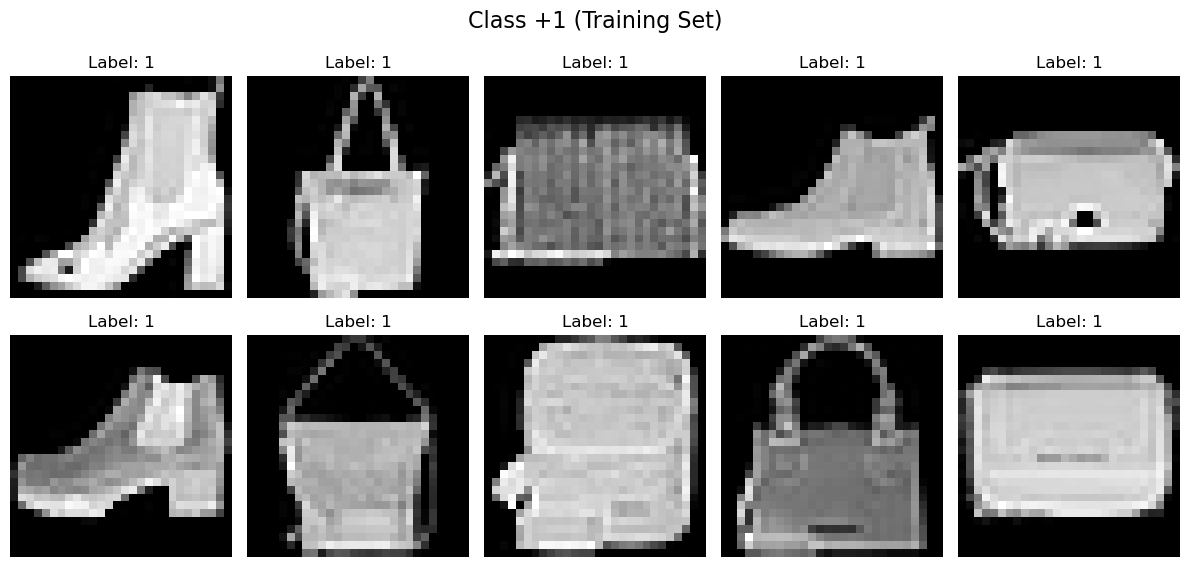

Displaying 10 images from the Test Set:


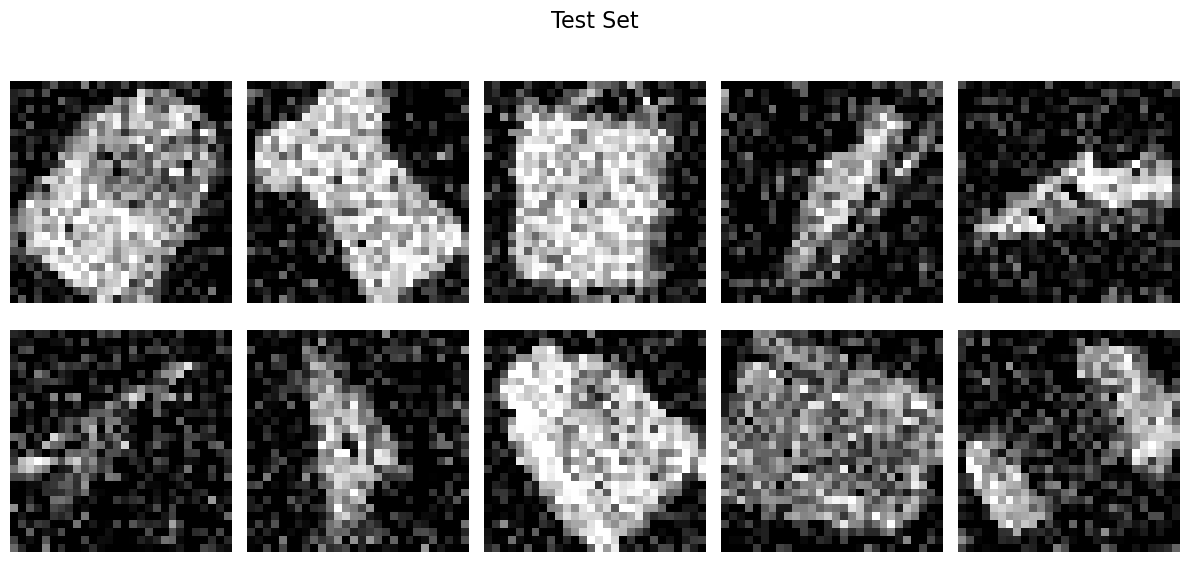

In [11]:
# Function to plot images
def plot_images(images, labels=None, title="Images"):
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap="gray")
        plt.axis("off")
        if labels is not None:
            plt.title(f"Label: {labels[i]}")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Reshape flattened vectors into 28x28 images
X_train_images = X_train.reshape(-1, 28, 28)
X_test_images = X_test.reshape(-1, 28, 28)

# Visualise 10 random images from each class in the training set
class_neg1 = X_train_images[Y_train == -1][:10]  # First 10 samples of class -1
class_pos1 = X_train_images[Y_train == 1][:10]   # First 10 samples of class +1

print("Displaying 10 images from Class -1:")
plot_images(class_neg1, labels=[-1] * 10, title="Class -1 (Training Set)")

print("Displaying 10 images from Class +1:")
plot_images(class_pos1, labels=[1] * 10, title="Class +1 (Training Set)")

# Visualise 10 random images from the test set
print("Displaying 10 images from the Test Set:")
plot_images(X_test_images[:10], title="Test Set")


Observations from the Visualised Data

1️⃣ Class -1 Images

The images are of clothing items like hoodies, jackets, and shoes.
There is a level of complexity in textures with certain shapes hard to guess also we could see a little change in brightness as well

2️⃣ Class +1 Images
These images represent accessories like bags, boots, and purses.
The items show distinct outlines compared to Class -1, but some similarities in texture could confuse the classifier.
The accessories may have a simpler structure compared to clothing items.

3️⃣ Test Set Images
Test set images seem more noisy compared to our training dataset.
The test set includes a mix of items that likely correspond to both classes, but we cannot confirm labels.

Class Imbalance: Class +1 is underrepresented, so misclassification is more likely.

Noisy Data: Variations in brightness or small artifacts might affect accuracy.

### Choosing the Right Metric for This Task
While choosing the best performance metric for any ML modeling it depends on the dataset characteristics, such as class imbalance, and the importance given to false positives or false negatives. Firstly below we define each metric and then analyse which are the ones useful for our case
Selecting the best performance metric depends on dataset characteristics, such as class imbalance and the importance of false positives vs. false negatives. Below, we define and analyze various metrics to determine the best one for our classification task.

###  Understanding the Metrics
| Metric | Definition | Best Used When... |
|------------|---------------|----------------------|
| Accuracy | The proportion of correctly classified samples:  Accuracy = (TP + TN)/Total Samples | The dataset is balanced and misclassification costs are equal. |
| AUC-ROC | Measures the ability to separate classes across various thresholds. Higher means better ranking of positive & negative samples. | We need a global ranking of predictions (useful for balanced datasets). |
| AUC-PR | Precision-Recall AUC focuses on the model’s ability to identify positive cases, crucial in imbalanced datasets. | Best for imbalanced datasets where positives are rare but important. |
| F1-Score | Harmonic mean of Precision and Recall: F1 = 2 *(Precision * Recall)/(Precision + Recall)| Needed when false positives & false negatives have similar costs. |
| Matthews Correlation Coefficient (MCC) | Measures overall correlation between true & predicted labels: MCC = ((TP*TN) - (FP*FN)) \(sqrt(TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)) | Best for imbalanced datasets, captures true class balance. |
| Mean Squared Error (MSE) | Measures the average squared difference between true and predicted values. Mostly used in regression. | Not ideal for classification, as it treats predictions as continuous values. |



###  Which Metric is Best for Our Task?

#### 1️⃣  AUC-ROC? 
- Good when we need overall class separation ability.
- Works well if the dataset is somewhat balanced, but struggles when the minority class is very small.

#### 2️⃣  AUC-PR?  (Best for Our Task)
- Focuses on detecting the minority class (`+1`), which is crucial here.
- Since Precision and Recall matter more than raw accuracy, AUC-PR is the best metric.

####  3️⃣ F1-Score? 
- Since false negatives and false positives are both important, F1-score is useful.
- However, it does not provide threshold-independent evaluation like AUC-PR.

#### 4️⃣ MCC? 
- Great for imbalanced datasets, as it considers all four values of the confusion matrix.
- More informative than F1-score when classes are heavily imbalanced.


In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, f1_score, matthews_corrcoef

# Generate random predictions and probabilities
np.random.seed(42)  # For reproducibility
y_random_prob = np.random.uniform(-1, 1, size=len(Y_train))  # Random probabilities between -1 and +1
y_random_pred = np.where(y_random_prob > 0, 1, -1)  # Convert probabilities to class predictions

# Evaluate metrics for the random classifier
def evaluate_metrics(y_true, y_pred, y_prob):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_prob)
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    auc_pr = auc(recall, precision)
    f1 = f1_score(y_true, y_pred, average="binary")
    mcc = matthews_corrcoef(y_true, y_pred)
    
    # Print results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"AUC-ROC: {auc_roc:.2f}")
    print(f"AUC-PR: {auc_pr:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"MCC: {mcc:.2f}")
    
    return accuracy, auc_roc, auc_pr, f1, mcc

# Evaluate random classifier
print("Benchmarking Random Classifier on Training Set:")
evaluate_metrics(Y_train, y_random_pred, y_random_prob)


Benchmarking Random Classifier on Training Set:
Accuracy: 0.51
AUC-ROC: 0.52
AUC-PR: 0.21
F1-Score: 0.30
MCC: 0.02


(0.5056666666666667,
 np.float64(0.5182975609622908),
 np.float64(0.20832770425545755),
 np.float64(0.3034288398309065),
 np.float64(0.021366374247993137))

Random Classifier Baseline:

From this model we can evaluate how our future models should be performing. Any good model would need to significantly outperform the AUC-ROC, AUC-PR, F1-score and MCC since these are much better metrics when accounting for class imbalance

AUC-ROC (0.52) is slightly above random (0.50)

Our model does slightly better than random guessing.
However, a good classifier should achieve AUC-ROC > 0.8.
AUC-PR (0.21) matches the random classifier

This means our model struggles with the minority class.
The model is not effectively prioritizing positive samples, leading to poor precision-recall performance.

We can test some SVM kernels and also use feature extraction like PCA to get a better results and remove irrelavant datapoints

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

# Initialize kNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics for each fold
metrics = {
    "accuracy": [],
    "balanced_accuracy": [],
    "auc_roc": [],
    "auc_pr": [],
    "f1_score": [],
    "mcc": []
}

# Cross-validation loop
for train_index, val_index in skf.split(X_train, Y_train):
    # Split data into train and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]
    
    # Train kNN model
    knn.fit(X_train_fold, Y_train_fold)
    
    # Predict on validation set
    Y_val_pred = knn.predict(X_val_fold)
    Y_val_prob = knn.predict_proba(X_val_fold)[:, 1]  # Probability scores for class +1
    
    # Calculate metrics
    metrics["accuracy"].append(accuracy_score(Y_val_fold, Y_val_pred))
    metrics["balanced_accuracy"].append(balanced_accuracy_score(Y_val_fold, Y_val_pred))
    metrics["auc_roc"].append(roc_auc_score(Y_val_fold, Y_val_prob))
    precision, recall, _ = precision_recall_curve(Y_val_fold, Y_val_prob)
    metrics["auc_pr"].append(auc(recall, precision))
    metrics["f1_score"].append(f1_score(Y_val_fold, Y_val_pred))
    metrics["mcc"].append(matthews_corrcoef(Y_val_fold, Y_val_pred))

# Calculate mean and standard deviation for each metric
print("kNN Classifier Performance (5-Fold Cross-Validation):")
for metric_name, values in metrics.items():
    print(f"{metric_name.capitalize()}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}")


kNN Classifier Performance (5-Fold Cross-Validation):
Accuracy: Mean = 0.9657, Std = 0.0029
Balanced_accuracy: Mean = 0.9446, Std = 0.0067
Auc_roc: Mean = 0.9748, Std = 0.0040
Auc_pr: Mean = 0.9623, Std = 0.0062
F1_score: Mean = 0.9156, Std = 0.0062
Mcc: Mean = 0.8944, Std = 0.0080


| Metric           | Mean    | Std     | Interpretation                                                                 |
|------------------|---------|---------|---------------------------------------------------------------------------------|
| Accuracy         | 0.9657  | 0.0029  | High accuracy suggests the model is making mostly correct predictions.          |
| Balanced Accuracy| 0.9446  | 0.0067  | Indicates good performance across both classes despite the class imbalance.     |
| AUC-ROC          | 0.9748  | 0.0040  | Excellent ranking ability, meaning the classifier separates classes well.       |
| AUC-PR           | 0.9623  | 0.0062  | High precision-recall performance, reflecting good detection of minority class. |
| F1-Score         | 0.9156  | 0.0062  | Good balance between precision and recall, especially for the minority class.   |
| MCC              | 0.8944  | 0.0080  | High correlation between predictions and true labels, robust against imbalance. |

Strong Overall Performance:

The KNN classifier has performed significantly better than our random classifier, it tackles the issue of class imbalance well since we are getting AU-ROC and AUC-PR of 0.97 and 0.96 respectively which is very high for an imbalanced dataset. Also the high F1 score suggests that there is a proper balance between precision and recall for the minority class

The standard deviation is low across all metrics which would suggest a consistent performance across folds.

A mean accuracy of 0.94 shows its more balanced and not too biased towards our majority class

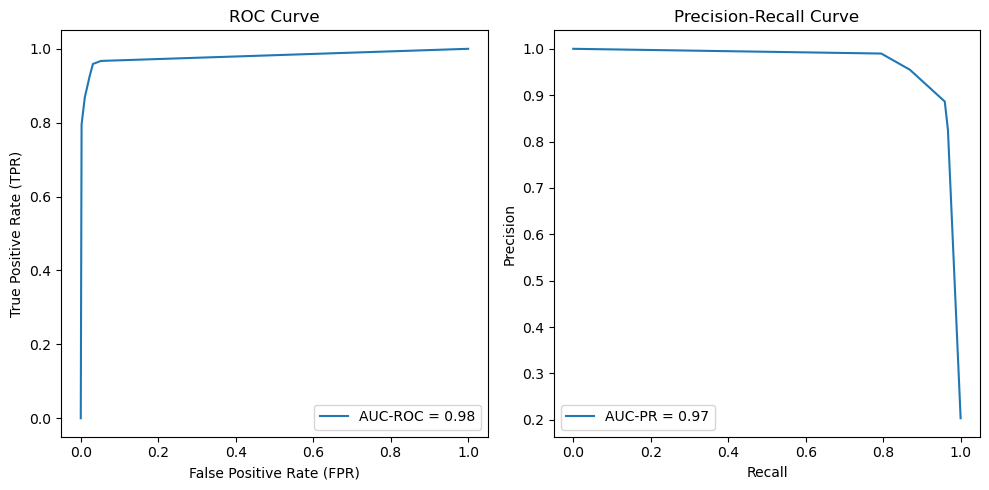

In [14]:
from sklearn.metrics import roc_curve, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

# Select a fold (example: first fold)
train_index, val_index = next(iter(skf.split(X_train, Y_train)))

# Split data for the selected fold
X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

# Train and predict with kNN
knn.fit(X_train_fold, Y_train_fold)
Y_val_prob = knn.predict_proba(X_val_fold)[:, 1]  # Probability scores for class +1

# Calculate ROC and PR values
fpr, tpr, _ = roc_curve(Y_val_fold, Y_val_prob)
precision, recall, _ = precision_recall_curve(Y_val_fold, Y_val_prob)

# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc_score(Y_val_fold, Y_val_prob):.2f}")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"AUC-PR = {auc(recall, precision):.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()


Observations from the ROC and PR Curves

The AUC-ROC curve is close to the top-left corner, indicating excellent performance with a score of 0.98

For our PR curve, Precision remains high even at varying levels of recall, with a slight drop at the very end.\
AUC-PR = 0.97 \
When Precision remains very high at high recall levels, it means that the model has effectively balanced the trade-off.️

Which Part of the ROC Curve is Most Important?
The most important region in the ROC curve is where FPR is very low (left-most region of the curve)./
When we have an imbalanced dataset, FPs are difficult to handle as the majority class can be missclassified most of the time. A model that has low FPR would ensure that very few majority class(-1, clothing) are missclassified as accessories(+1)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'roc_auc': 'roc_auc',
    'average_precision': 'average_precision'  # AUC-PR
}

# Stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameter grids
param_grid_svm_rbf = {'svc__C': [0.1, 1, 10], 'svc__gamma': [0.01, 0.1, 'scale']}
param_grid_svm_poly = {'svc__C': [0.1, 1, 10], 'svc__degree': [2, 3, 4], 'svc__gamma': ['scale']}
param_grid_rf = {'randomforestclassifier__n_estimators': [100, 200], 
                 'randomforestclassifier__max_depth': [10, 20, None],
                 'randomforestclassifier__min_samples_split': [2, 5]}

# SVM (RBF) Pipeline
pipeline_svm_rbf = Pipeline([
    ('scaler', StandardScaler()),  # Standardise features
    ('svc', SVC(kernel='rbf', probability=True, random_state=42))
])

# SVM (Polynomial Kernel) Pipeline
pipeline_svm_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='poly', probability=True, random_state=42))
])

# Random Forest Pipeline
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Optional for RF, ensures compatibility in pipeline
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# Perform GridSearchCV for each model
def tune_model(pipeline, param_grid, name):
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=scoring, refit='roc_auc', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, Y_train)
    return grid_search

# Tune models
svm_rbf_cv = tune_model(pipeline_svm_rbf, param_grid_svm_rbf, "SVM (RBF)")
svm_poly_cv = tune_model(pipeline_svm_poly, param_grid_svm_poly, "SVM (Poly)")
rf_cv = tune_model(pipeline_rf, param_grid_rf, "Random Forest")

# Collect results
results = {
    "Model": ["SVM (RBF)", "SVM (Poly)", "Random Forest"],
    "Best Params": [svm_rbf_cv.best_params_, svm_poly_cv.best_params_, rf_cv.best_params_],
    "Accuracy (Mean ± Std)": [
        f"{svm_rbf_cv.cv_results_['mean_test_accuracy'][svm_rbf_cv.best_index_]:.4f} ± {svm_rbf_cv.cv_results_['std_test_accuracy'][svm_rbf_cv.best_index_]:.4f}",
        f"{svm_poly_cv.cv_results_['mean_test_accuracy'][svm_poly_cv.best_index_]:.4f} ± {svm_poly_cv.cv_results_['std_test_accuracy'][svm_poly_cv.best_index_]:.4f}",
        f"{rf_cv.cv_results_['mean_test_accuracy'][rf_cv.best_index_]:.4f} ± {rf_cv.cv_results_['std_test_accuracy'][rf_cv.best_index_]:.4f}"
    ],
    "Balanced Acc (Mean ± Std)": [
        f"{svm_rbf_cv.cv_results_['mean_test_balanced_accuracy'][svm_rbf_cv.best_index_]:.4f} ± {svm_rbf_cv.cv_results_['std_test_balanced_accuracy'][svm_rbf_cv.best_index_]:.4f}",
        f"{svm_poly_cv.cv_results_['mean_test_balanced_accuracy'][svm_poly_cv.best_index_]:.4f} ± {svm_poly_cv.cv_results_['std_test_balanced_accuracy'][svm_poly_cv.best_index_]:.4f}",
        f"{rf_cv.cv_results_['mean_test_balanced_accuracy'][rf_cv.best_index_]:.4f} ± {rf_cv.cv_results_['std_test_balanced_accuracy'][rf_cv.best_index_]:.4f}"
    ],
    "AUC-ROC (Mean ± Std)": [
        f"{svm_rbf_cv.best_score_:.4f}",
        f"{svm_poly_cv.best_score_:.4f}",
        f"{rf_cv.best_score_:.4f}"
    ],
    "AUC-PR (Mean ± Std)": [
        f"{svm_rbf_cv.cv_results_['mean_test_average_precision'][svm_rbf_cv.best_index_]:.4f} ± {svm_rbf_cv.cv_results_['std_test_average_precision'][svm_rbf_cv.best_index_]:.4f}",
        f"{svm_poly_cv.cv_results_['mean_test_average_precision'][svm_poly_cv.best_index_]:.4f} ± {svm_poly_cv.cv_results_['std_test_average_precision'][svm_poly_cv.best_index_]:.4f}",
        f"{rf_cv.cv_results_['mean_test_average_precision'][rf_cv.best_index_]:.4f} ± {rf_cv.cv_results_['std_test_average_precision'][rf_cv.best_index_]:.4f}"
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)
print("\nTuned Model Comparison Results:")
print(results_df)


Tuning SVM (RBF)...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tuning SVM (Poly)...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tuning Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Tuned Model Comparison Results:
           Model                                        Best Params  \
0      SVM (RBF)              {'svc__C': 10, 'svc__gamma': 'scale'}   
1     SVM (Poly)  {'svc__C': 10, 'svc__degree': 3, 'svc__gamma':...   
2  Random Forest  {'randomforestclassifier__max_depth': 10, 'ran...   

  Accuracy (Mean ± Std) Balanced Acc (Mean ± Std) AUC-ROC (Mean ± Std)  \
0       0.9740 ± 0.0054           0.9601 ± 0.0042               0.9922   
1       0.9660 ± 0.0054           0.9339 ± 0.0054               0.9871   
2       0.9700 ± 0.0060           0.9461 ± 0.0096               0.9922   

  AUC-PR (Mean ± Std)  
0     0.9795 ± 0.0092  
1     0.9719 ± 0.0132  
2     0.9786 ± 0.0085  


| Model          | Best Params                                  | Accuracy (Mean ± Std) | Balanced Acc (Mean ± Std) | AUC-ROC (Mean ± Std) | AUC-PR (Mean ± Std)  |
|----------------|-----------------------------------------------|------------------------|----------------------------|-----------------------|----------------------|
| SVM (RBF)      | `{'C': 10, 'gamma': 'scale'}`                  | 0.9740 ± 0.0054        | 0.9601 ± 0.0042            | 0.9922               | 0.9795 ± 0.0092     |
| SVM (Poly)     | `{'C': 10, 'degree': 3, 'gamma': 'scale'}`     | 0.9660 ± 0.0054        | 0.9339 ± 0.0054            | 0.9871               | 0.9719 ± 0.0132     |
| Random Forest  | `{'max_depth': 10, 'n_estimators': 100}`       | 0.9700 ± 0.0060        | 0.9461 ± 0.0096            | 0.9922               | 0.9786 ± 0.0085     |

Our strategy to choose the optimal classifier is based on 3 factors: Higher performance(AUC-ROC, AUC-PR and balanced accuracy), lower standard deviation and interpretability 

SVM (RBF) and Random Forest perform similarly in AUC-ROC:\
Both achieve AUC-ROC = 0.9922, meaning they are excellent at distinguishing between classes.

SVM (RBF) is the best-performing model overall.
Our optimal model would be SVM(RBF) since it has the best performance in all metrics and is more interpretable than random forest as well.

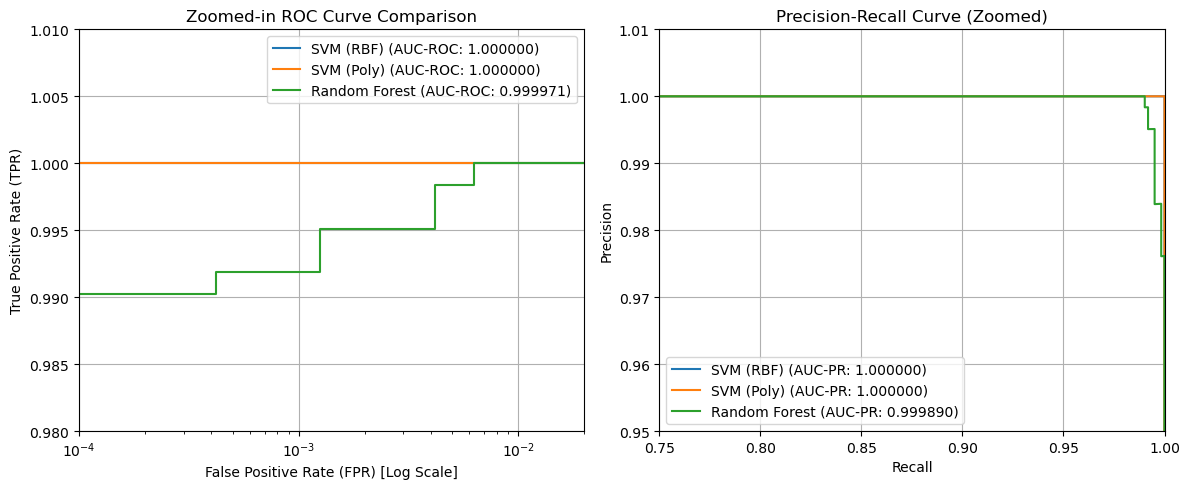

In [19]:
# Store models in a dictionary for easy iteration
models = {
    "SVM (RBF)": svm_rbf_cv.best_estimator_,
    "SVM (Poly)": svm_poly_cv.best_estimator_,
    "Random Forest": rf_cv.best_estimator_
}

# Generate predictions
plt.figure(figsize=(12, 5))

# Plot ROC Curve (Zoomed-In)
plt.subplot(1, 2, 1)
for name, model in models.items():
    Y_prob = model.predict_proba(X_train)[:, 1]  # Probability scores for class +1
    fpr, tpr, _ = roc_curve(Y_train, Y_prob)
    auc_roc = auc(fpr, tpr)

    # Plot the precise ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC-ROC: {auc_roc:.6f})")

# Zoom in on the crucial part of the curve
plt.xlim([0.0001, 0.02])  # Focus on low FPR
plt.ylim([0.98, 1.01])    # Focus on high TPR
plt.xscale("log")         # Use log scale for better visibility
plt.xlabel("False Positive Rate (FPR) [Log Scale]")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Zoomed-in ROC Curve Comparison")
plt.legend()
plt.grid(True)

# Plot Precision-Recall Curve (Zoomed-In)
plt.subplot(1, 2, 2)
for name, model in models.items():
    Y_prob = model.predict_proba(X_train)[:, 1]
    precision, recall, _ = precision_recall_curve(Y_train, Y_prob)
    auc_pr = auc(recall, precision)

    # Plot the precise PR curve
    plt.plot(recall, precision, label=f"{name} (AUC-PR: {auc_pr:.6f})")

# Zoom in on the high recall region
plt.xlim([0.75, 1.0])  # Focus on high recall values
plt.ylim([0.95, 1.01])  # Show subtle precision differences
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Zoomed)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


The SVM(RBF) and SVM(Poly) are coinciding so adding a poly kernel does not make sense since RBF is good enough for our case. RBF and poly both maintain an AUC-PR and AUC-ROC of 1.0 which would mean they can distinguish between the two classes perfectly. Wheareas for Random Forest the score for AUC-ROC 0.999971 which means a very slight fluctuations in TPR at low FPR values and for AUC-PR it is 0.99989 which would mean it missclassifies a few samples as compared to SVM models but nearly the same. Also generalisation would be difficult since overfitting can happen if we take a real world dataset that differs from our training data.

We have taken zoomed-in plots to see minor differences since there is not much the models differ in.

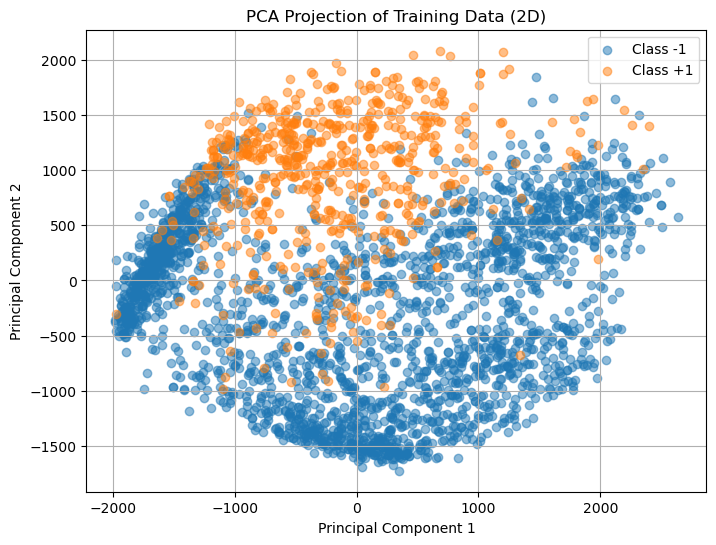

In [20]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train)

# Scatter plot of PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca_2d[Y_train == -1, 0], X_train_pca_2d[Y_train == -1, 1], label="Class -1", alpha=0.5)
plt.scatter(X_train_pca_2d[Y_train == 1, 0], X_train_pca_2d[Y_train == 1, 1], label="Class +1", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Training Data (2D)")
plt.legend()
plt.grid(True)
plt.show()



For the most part class -1 and +1 are seperated. We can see some overlapping in the middle region.\
Class +1 is is more concentrated in the 1000-1500 mark on y axis and between -1000 to 100 in x axis. Whereas class -1 is concentrated in 3 regions.

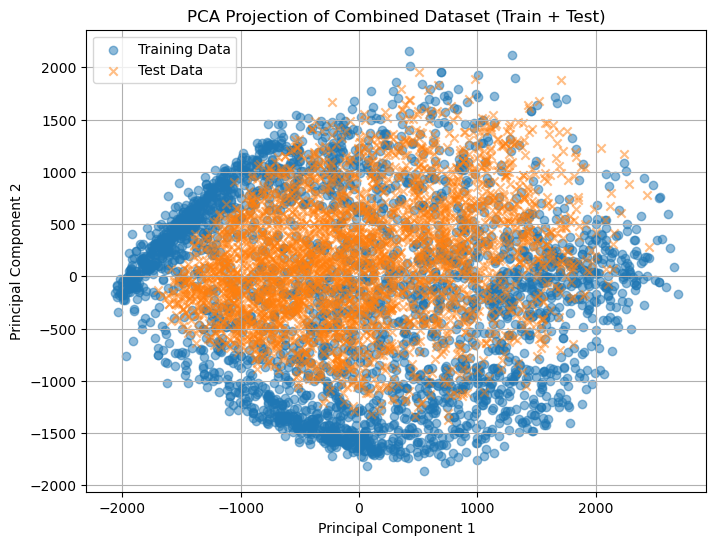

In [21]:
# Apply PCA on entire dataset (train + test)
X_combined = np.vstack((X_train, X_test))
pca_2d_combined = PCA(n_components=2)
X_combined_pca_2d = pca_2d_combined.fit_transform(X_combined)

# Split transformed data back into train and test sets
X_train_pca_combined = X_combined_pca_2d[:len(X_train)]
X_test_pca_combined = X_combined_pca_2d[len(X_train):]

# Scatter plot of PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca_combined[:, 0], X_train_pca_combined[:, 1], label="Training Data", alpha=0.5)
plt.scatter(X_test_pca_combined[:, 0], X_test_pca_combined[:, 1], label="Test Data", alpha=0.5, marker="x")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Combined Dataset (Train + Test)")
plt.legend()
plt.grid(True)
plt.show()


From the plot above we can observe that the test data is mostly in the centre awhile our traning data is more on the outer regions the mid left and lower region of the plot. While there is overlap in the middle between the test and training data there is no test data for the areas where training data is higly concentrated.

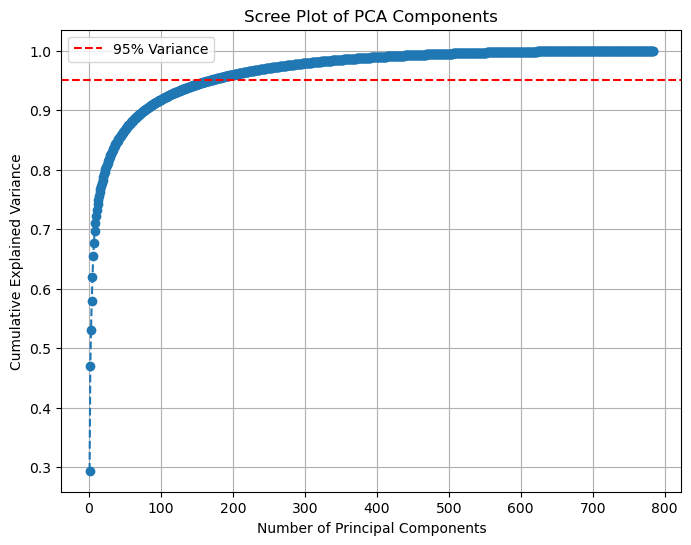

In [22]:
# Apply PCA with all components
pca_full = PCA()
pca_full.fit(X_train)

# Explained variance ratio
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="--")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot of PCA Components")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
from sklearn.model_selection import cross_val_score

# Identify number of components that explain 95% variance
num_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of PCA components for 95% variance: {num_components}")

# Apply PCA with optimal number of components
pca_optimal = PCA(n_components=num_components)
X_train_pca = pca_optimal.fit_transform(X_train)
X_test_pca = pca_optimal.transform(X_test)

# Train SVM (RBF) on PCA-transformed data
svm_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])

# Evaluate using 5-fold cross-validation
scores = cross_val_score(svm_pca, X_train_pca, Y_train, cv=5, scoring="roc_auc")

# Print performance comparison
print(f"Mean AUC-ROC with PCA: {scores.mean():.4f} ± {scores.std():.4f}")


Number of PCA components for 95% variance: 168
Mean AUC-ROC with PCA: 0.9912 ± 0.0033


In [26]:

# Standardize the features before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA and retain 168 components (or experiment with fewer)
pca = PCA(n_components=168)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original dimensions: {X_train.shape[1]}, Reduced dimensions: {X_train_pca.shape[1]}")


Original dimensions: 784, Reduced dimensions: 168


In [28]:
# Define Stratified 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameter grid for SVM with RBF kernel
param_grid_svm_pca = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.01, 0.1, 'scale']
}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'roc_auc': 'roc_auc',
    'average_precision': 'average_precision'  # AUC-PR
}

# Perform Grid Search
svm_pca = SVC(kernel='rbf', probability=True, random_state=42)
grid_search_svm_pca = GridSearchCV(svm_pca, param_grid_svm_pca, cv=cv, scoring=scoring, refit='roc_auc', n_jobs=-1, verbose=1)
grid_search_svm_pca.fit(X_train_pca, Y_train)

# Print best parameters
print(f"Best parameters for SVM (PCA-reduced): {grid_search_svm_pca.best_params_}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM (PCA-reduced): {'C': 10, 'gamma': 'scale'}


In [29]:
# Extract best scores
best_svm_pca = grid_search_svm_pca.best_estimator_
cv_results = grid_search_svm_pca.cv_results_

# Print cross-validation results
results_pca = {
    "AUC-ROC (Mean ± Std)": f"{grid_search_svm_pca.best_score_:.4f} ± {cv_results['std_test_roc_auc'][grid_search_svm_pca.best_index_]:.4f}",
    "AUC-PR (Mean ± Std)": f"{cv_results['mean_test_average_precision'][grid_search_svm_pca.best_index_]:.4f} ± {cv_results['std_test_average_precision'][grid_search_svm_pca.best_index_]:.4f}",
    "Balanced Accuracy (Mean ± Std)": f"{cv_results['mean_test_balanced_accuracy'][grid_search_svm_pca.best_index_]:.4f} ± {cv_results['std_test_balanced_accuracy'][grid_search_svm_pca.best_index_]:.4f}",
}

print("\nOptimal Cross-Validation Performance with PCA-SVM:")
for metric, value in results_pca.items():
    print(f"{metric}: {value}")



Optimal Cross-Validation Performance with PCA-SVM:
AUC-ROC (Mean ± Std): 0.9925 ± 0.0038
AUC-PR (Mean ± Std): 0.9806 ± 0.0084
Balanced Accuracy (Mean ± Std): 0.9601 ± 0.0026


In [32]:
# Train final SVM (RBF) model with best parameters
best_svm_rbf = SVC(C=10, gamma='scale', kernel='rbf', probability=True, random_state=42)
best_svm_rbf.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred = best_svm_rbf.predict(X_test)

# Convert to expected format (-1 or +1)
Y_test_pred = np.where(Y_test_pred > 0, 1, -1)


In [33]:
# Get prediction probabilities for class +1
Y_test_prob = best_svm_rbf.predict_proba(X_test)[:, 1]  # Probability of class +1

# Convert to DataFrame
submission_df = pd.DataFrame(Y_test_prob, columns=["Prediction_Probability"])

# Save to CSV
submission_file = "u5670302.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Prediction probabilities saved to: {submission_file}")


Prediction probabilities saved to: u5670302.csv


In [37]:
# Create combined feature set
X_combined = np.vstack((X_train, X_test))

# Create new labels: Training = -1, Test = +1
Y_combined = np.hstack((-1 * np.ones(len(X_train)), +1 * np.ones(len(X_test))))

print(f"New classification dataset size: {X_combined.shape}, Labels: {Y_combined.shape}")


New classification dataset size: (6000, 784), Labels: (6000,)


In [38]:
# Define classifier (Random Forest)
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Perform 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_roc_scores = cross_val_score(rf_classifier, X_combined, Y_combined, cv=cv, scoring='roc_auc')

# Print mean and standard deviation of AUC-ROC
mean_auc_roc = np.mean(auc_roc_scores)
std_auc_roc = np.std(auc_roc_scores)
print(f"Mean AUC-ROC: {mean_auc_roc:.4f} ± {std_auc_roc:.4f}")


Mean AUC-ROC: 1.0000 ± 0.0000


Training and Test Sets Are Highly Distinguishable

So our classifier can perfectly sepertate them which would mean the data distributions are different and the model has learned patterns unique to each set. While it is not what we wanted. Our classification task is to generalize and learn the features.

We can add gaussian noise to training features so as to mimic some variations in the test data. Also we can use min max scaler to transform the data to make it more consistent and reduce the affects of outliers and the dataset becomes more consistet acroos both the sets i.e training and test. Also introducing random rotations also helps in making the dataset less different


In [55]:
import numpy as np

def add_noise(X, noise_level=0.5):
    """Adds Gaussian noise to the dataset."""
    return X + noise_level * np.random.normal(size=X.shape)

# Apply noise to the training set
X_train_noisy = add_noise(X_train, noise_level=0.5)

print("Random noise added to the training set.")


Random noise added to the training set.


In [59]:
def apply_random_rotation(X):
    """Applies a random rotation to the dataset using PCA."""
    pca = PCA(n_components=X.shape[1])  # Full-dimensional PCA
    X_pca = pca.fit_transform(X)
    
    # Apply a random orthogonal transformation
    random_rotation = np.random.randn(X.shape[1], X.shape[1])
    U, _, Vt = np.linalg.svd(random_rotation)  # Compute a random rotation matrix
    X_rotated = np.dot(X_pca, U)  # Apply rotation

    return pca.inverse_transform(X_rotated)  # Transform back to original space

# Apply random rotations to the noisy training data
X_train_augmented = apply_random_rotation(X_train_noisy)

print("Random rotations applied to the training set.")


Random rotations applied to the training set.


In [60]:
# Create a new combined dataset
X_combined_aug = np.vstack((X_train_augmented, X_test))
Y_combined = np.hstack((-1 * np.ones(len(X_train)), +1 * np.ones(len(X_test))))

# Define the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Perform 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_roc_scores = cross_val_score(rf_classifier, X_combined_aug, Y_combined, cv=cv, scoring='roc_auc')

# Print the new AUC-ROC
new_auc_roc = np.mean(auc_roc_scores)
new_auc_roc_std = np.std(auc_roc_scores)

print(f"New AUC-ROC after noise and rotation: {new_auc_roc:.4f} ± {new_auc_roc_std:.4f}")


New AUC-ROC after noise and rotation: 1.0000 ± 0.0000


Fundamental Feature Differences Still Exist

We can still see the AUC-ROC score to be 1.0 with no standard deviation even after applying noise and random rotations. It looks like the test data follows a distinct pattern which could be due to noise contrast or maybe resolution. The test features might have different statistical distributions which random noise cannot fix. Also, the training and test data might originate from different sources which could also make both of them distinct.

We can make use of data augmentation techniques like scaling, flipping, and contrast changes to make our datasets look a little similar.
